**Loading Packages and Dataset**

In [273]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [274]:
# Load the dataset
df = pd.read_csv('/content/Train.csv')

In [275]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**Data Exploration**


In [276]:
# Get information about data types and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [277]:
# Get summary statistics for numerical columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [278]:
# Check for missing values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [279]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

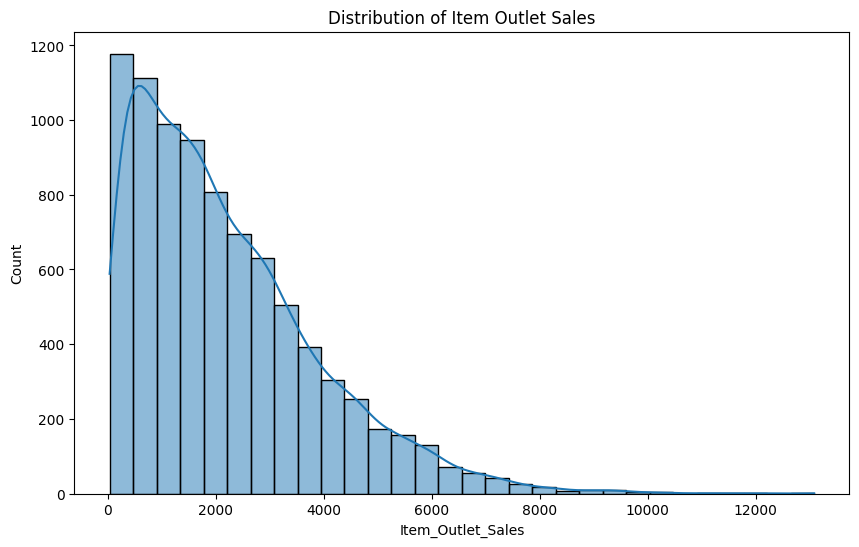

In [280]:
# Visualize the distribution of Item_Outlet_Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Outlet_Sales'], bins=30, kde=True)
plt.title('Distribution of Item Outlet Sales')
plt.show()

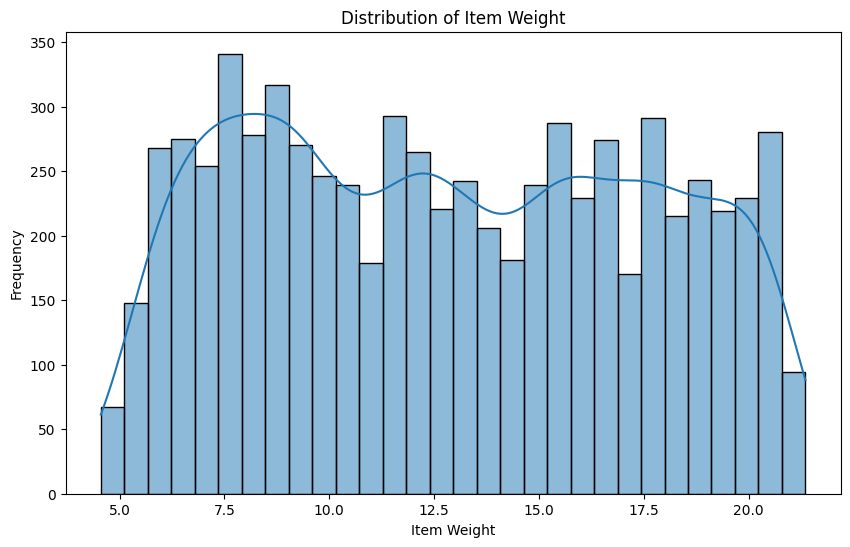

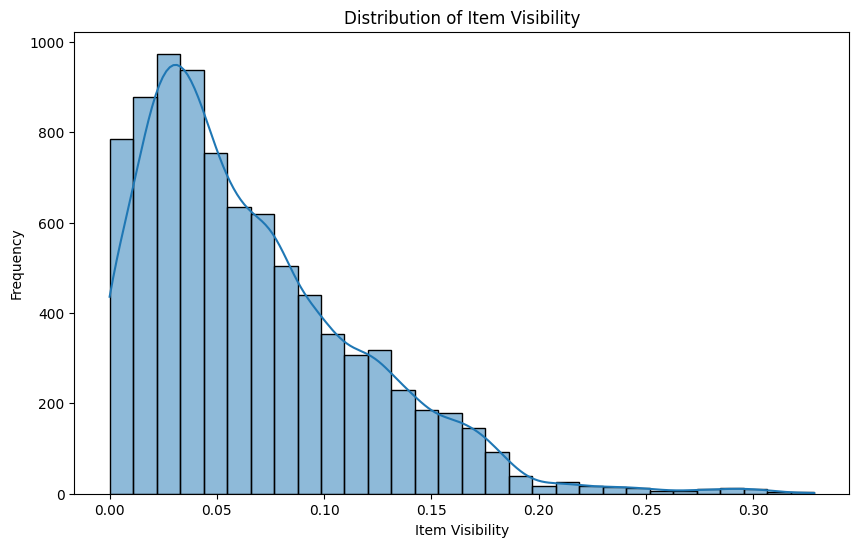

In [281]:
# Analyzing Item_Weight
plt.figure(figsize=(10, 6))
sns.histplot(df['Item_Weight'].dropna(), bins=30, kde=True)
plt.title('Distribution of Item Weight')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.show()

# Analyzing Item_Visibility
plt.figure(figsize=(10, 6))  # Adjust the figure size to be more appropriate
sns.histplot(df['Item_Visibility'], bins=30, kde=True)
plt.title('Distribution of Item Visibility')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

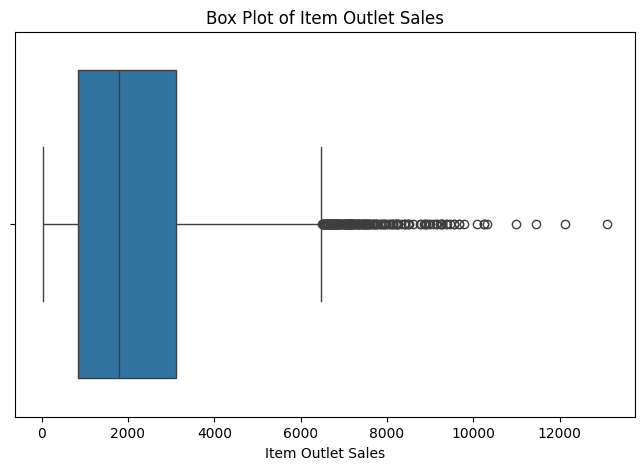

In [282]:
# Detect outliers in 'Item_Outlet_Sales' using box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Item_Outlet_Sales', data=df)
plt.title('Box Plot of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.show()

In [283]:
# Handle outliers in 'Item_Outlet_Sales' by capping values
q1 = df['Item_Outlet_Sales'].quantile(0.25)
q3 = df['Item_Outlet_Sales'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
df['Item_Outlet_Sales'] = np.where(df['Item_Outlet_Sales'] > upper_bound, upper_bound, df['Item_Outlet_Sales'])

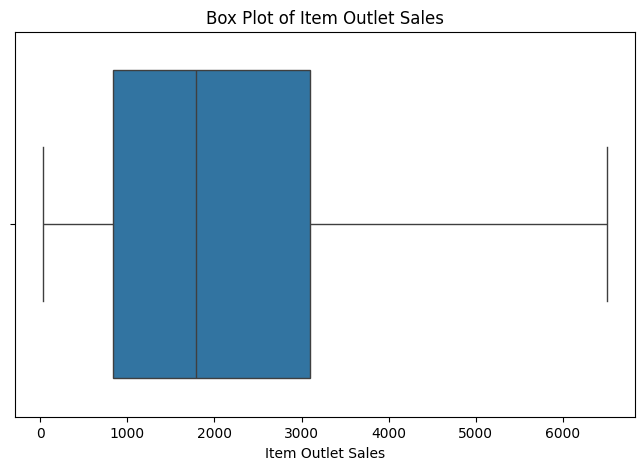

In [284]:
# Detect outliers in 'Item_Outlet_Sales' using box plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='Item_Outlet_Sales', data=df)
plt.title('Box Plot of Item Outlet Sales')
plt.xlabel('Item Outlet Sales')
plt.show()

<Figure size 1000x600 with 0 Axes>

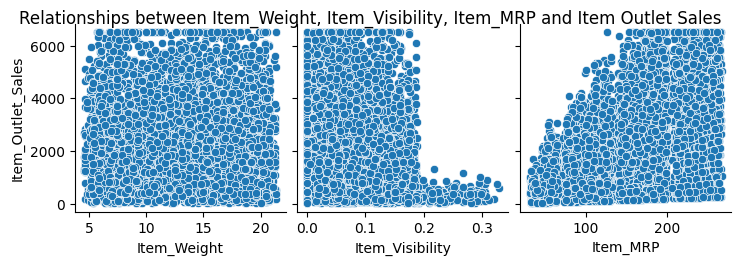

In [285]:
plt.figure(figsize=(10, 6))
sns.pairplot(df, x_vars=['Item_Weight', 'Item_Visibility', 'Item_MRP'], y_vars='Item_Outlet_Sales')
plt.suptitle('Relationships between Item_Weight, Item_Visibility, Item_MRP and Item Outlet Sales', y=1.02)
plt.show()

**Missing Value Treatment**

In [286]:
# Fill missing values in Item_Weight with the mean
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

# Fill missing values in Outlet_Size with the mode
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [287]:
# Check again for missing values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [288]:
# Standardize the values in the 'Item_Fat_Content' column
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'low fat': 'Low Fat','LF': 'Low Fat','reg': 'Regular'})

# Check the unique values after standardization
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

 **Label Encoding**

In [289]:
# Label Encoding for binary variables
le = LabelEncoder()
df['Item_Fat_Content'] = le.fit_transform(df['Item_Fat_Content'])

In [290]:
le = LabelEncoder()
df['Outlet_Size'] = le.fit_transform(df['Outlet_Size'])

In [291]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052


**One Hot Encoding**

In [292]:
# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Outlet_Location_Type', 'Outlet_Type'])

# Display the encoded DataFrame
df_encoded

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,3735.1380,True,False,False,False,True,False,False
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,443.4228,False,False,True,False,False,True,False
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,2097.2700,True,False,False,False,True,False,False
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,732.3800,False,False,True,True,False,False,False
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,994.7052,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,2778.3834,False,False,True,False,True,False,False
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,549.2850,False,True,False,False,True,False,False
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,1193.1136,False,True,False,False,True,False,False
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,1845.5976,False,False,True,False,False,True,False


In [293]:
le = LabelEncoder()
df['Outlet_Location_Type'] = le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = le.fit_transform(df['Outlet_Type'])

In [294]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,1,3735.1380
1,DRC01,5.920,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,2,443.4228
2,FDN15,17.500,0,0.016760,Meat,141.6180,OUT049,1999,1,0,1,2097.2700
3,FDX07,19.200,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,0,732.3800
4,NCD19,8.930,0,0.000000,Household,53.8614,OUT013,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,0,0.056783,Snack Foods,214.5218,OUT013,1987,0,2,1,2778.3834
8519,FDS36,8.380,1,0.046982,Baking Goods,108.1570,OUT045,2002,1,1,1,549.2850
8520,NCJ29,10.600,0,0.035186,Health and Hygiene,85.1224,OUT035,2004,2,1,1,1193.1136
8521,FDN46,7.210,1,0.145221,Snack Foods,103.1332,OUT018,2009,1,2,2,1845.5976
